# CNN

In [17]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import YouTubeVideo
from PIL import Image

In [62]:
def plot(X):
    plt.imshow(X, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')

def apply_filter(X, F):
    x, y = X.shape
    filter_x, filter_y = F.shape
    X_with_filter = np.zeros(shape=(x - filter_x, y - filter_y))

    for i in range(x - filter_x):
        for j in range(y - filter_y):
            X_with_filter[i, j] = (X[i:(i+filter_x), j:(j+filter_y)] * F).sum()
    
    return X_with_filter

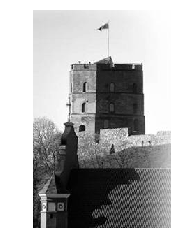

In [79]:
img = Image.open('img/castle.jpg')
img.load()
X = np.asarray(img, dtype="int32") / 255
# X = X.mean(axis=2) / 255
plot(X)

# Filters

## Simple box blur

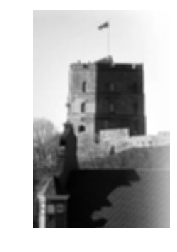

In [88]:
F = np.ones(shape=(5, 5)) / 25
plot(apply_filter(X, F))

## Line detection

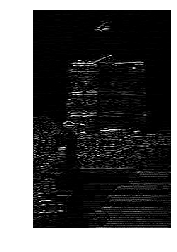

In [81]:
F = np.array([[-1, -1, -1],
              [ 2,  2,  2],
              [-1, -1, -1]])
plot(apply_filter(X, F))

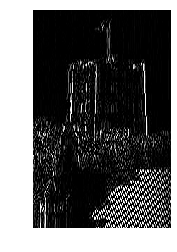

In [82]:
F = np.array([[-1, 2, -1],
              [-1, 2, -1],
              [-1, 2, -1]])
plot(apply_filter(X, F))

## Edge detection

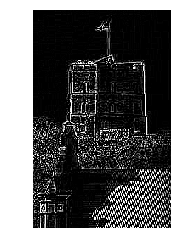

In [83]:
F = np.array([[-1, -1, -1],
              [-1,  8, -1],
              [-1, -1, -1]])
plot(apply_filter(X, F))

## The Sobel Edge Operator

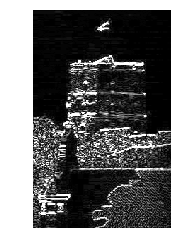

In [86]:
F_horizontal = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]])
F_vertical = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]])
plot(np.sqrt(apply_filter(X, F_horizontal)**2 + apply_filter(X, F_vertical)**2))

# CNN

Following video contains a neat visualization of CNN.

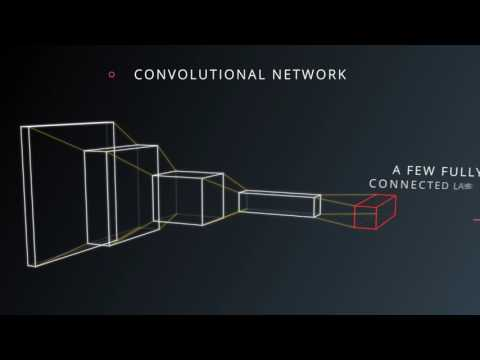

In [2]:
YouTubeVideo('utOv-BKI_vo', width=800, height=600)

Let's load MNIST dataset.

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Normalize (note that we add channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255

In [114]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_9 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               1843300   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 1,853,878
Trainable params: 1,853,878
Non-trainable params: 0
_________________________________________________________________


In [115]:
loss = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.3984 - acc: 0.8854 - val_loss: 0.1903 - val_acc: 0.9450
Epoch 2/10
48000/48000 [==============================] - 67s 1ms/step - loss: 0.1673 - acc: 0.9500 - val_loss: 0.1482 - val_acc: 0.9563
Epoch 3/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.1228 - acc: 0.9630 - val_loss: 0.1101 - val_acc: 0.9674
Epoch 4/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.0989 - acc: 0.9700 - val_loss: 0.1002 - val_acc: 0.9710
Epoch 5/10
48000/48000 [==============================] - 83s 2ms/step - loss: 0.0818 - acc: 0.9752 - val_loss: 0.0952 - val_acc: 0.9728
Epoch 6/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0702 - acc: 0.9781 - val_loss: 0.0929 - val_acc: 0.9714
Epoch 7/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.0607 - acc: 0.9814 - val_loss: 0.0833 - val_acc

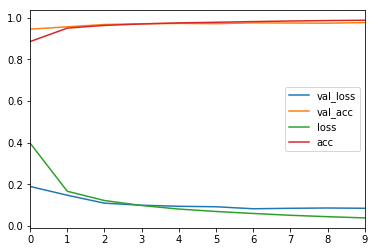

In [116]:
pd.DataFrame(loss.history).plot()

Using FCN we had 96.36% on test set.

In [117]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 97.72%


# What's next?

**NOTE:** LONG TRAINING TIME!

There are multiple other tricks (Dropout, MaxPooling, ...) which can increse performance even more, but general CNN principle is still leading solution in image recognition.

We will look at these tricks later, but let's see what they can do.

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=[28, 28, 1]))
model.add(BatchNormalization(axis=-1))   # Axis -1 is always the features axis
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [13]:
loss = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 138s 3ms/step - loss: 0.0053 - acc: 0.9982 - val_loss: 0.0586 - val_acc: 0.9885
Epoch 2/5
48000/48000 [==============================] - 134s 3ms/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0469 - val_acc: 0.9890
Epoch 3/5
48000/48000 [==============================] - 145s 3ms/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0487 - val_acc: 0.9906
Epoch 4/5
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0033 - acc: 0.9988 - val_loss: 0.0574 - val_acc: 0.9902
Epoch 5/5
48000/48000 [==============================] - 102s 2ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0677 - val_acc: 0.9889


In [15]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 98.98%


Usually in blogs and books you will find following implementation which uses dropout between CNN layers, but there is well known [critique](https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html) of this technique.

## Standard CNN implementation

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

Let's add logger so that we can check outputs in tensorboard. To run tensorboard use: `tensorboard --logdir=./my_logs --port=6006`.

In [23]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = TensorBoard(run_logdir)

In [24]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[tensorboard_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 87s 2ms/step - loss: 0.2842 - acc: 0.9127 - val_loss: 0.0660 - val_acc: 0.9810
Epoch 2/10
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0962 - acc: 0.9714 - val_loss: 0.0482 - val_acc: 0.9860
Epoch 3/10
48000/48000 [==============================] - 83s 2ms/step - loss: 0.0699 - acc: 0.9789 - val_loss: 0.0431 - val_acc: 0.9870
Epoch 4/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.0592 - acc: 0.9820 - val_loss: 0.0375 - val_acc: 0.9878
Epoch 5/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.0468 - acc: 0.9858 - val_loss: 0.0372 - val_acc: 0.9881
Epoch 6/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0356 - val_acc: 0.9904
Epoch 7/10
48000/48000 [==============================] - 83s 2ms/step - loss: 0.0379 - acc: 0.9882 - val_loss: 0.0337 - val_acc

Go to [tensorboard](http://localhost:6006) and familarize with it while model is training.

In [25]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 99.25%
